# Creating flux plots for thesis
This notebook is for creating illustrations of how the flux behaves at the cell interfaces.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from riemannsolver import data2d
from riemannsolver import netplot
from riemannsolver import function

from IPython.display import HTML
from tqdm import tqdm_notebook as tqdm

import matplotlib.animation as animation
from mpl_toolkits.mplot3d import axes3d, Axes3D

It is created a $M$ sized dataset using a sensibly large fine mesh parameter $N$, as well as Burgers' flux in both x- and y- direction.

In [3]:
M = 10
N = 200
f = lambda x: x**2/2
dfdu = lambda x: x

In [4]:
data = data2d.Dataset(
    M = M,
    N = N,
    f = f, dfdu = dfdu,
    g = f, dgdu = dfdu
)

In [5]:
data.create()

Data 1 of 10



Data 2 of 10



Data 3 of 10



Data 4 of 10



Data 5 of 10



Data 6 of 10



Data 7 of 10



Data 8 of 10



Data 9 of 10



Data 10 of 10


In [38]:
flux = netplot.Flux2D(data.data[:,:-1], data.flux)

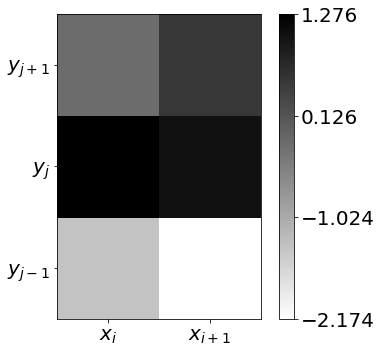

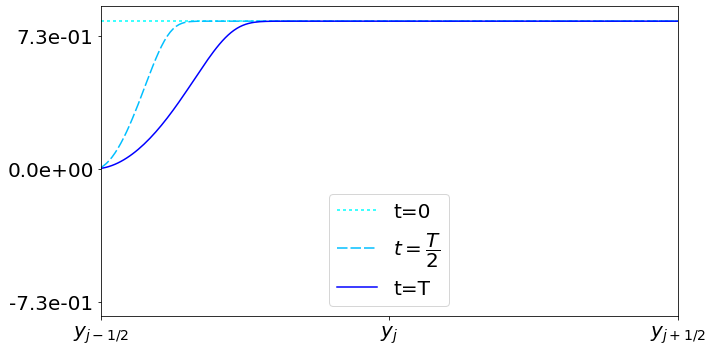

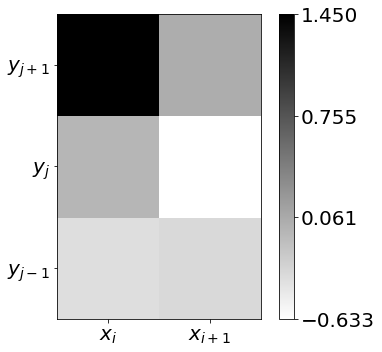

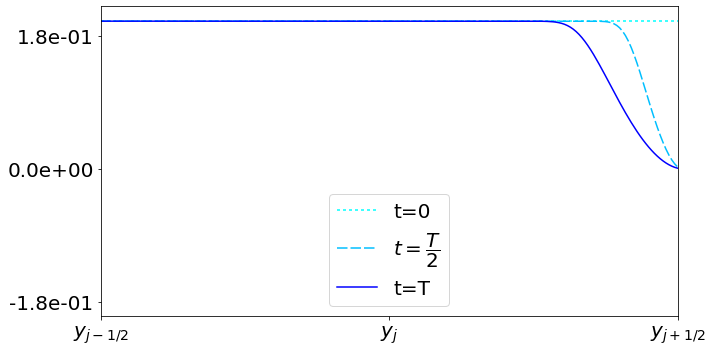

In [39]:
name = 'left'
flux.plot_n_save_cells(data=data.data[3,:-1], name=name)
flux.plot_n_save_flux(flux=data.flux[3], name=name)
name = 'right'
flux.plot_n_save_cells(data=data.data[6,:-1], name=name)
flux.plot_n_save_flux(flux=data.flux[6], name=name)

Number 0


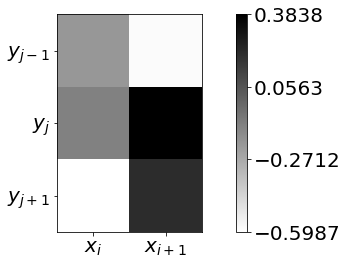

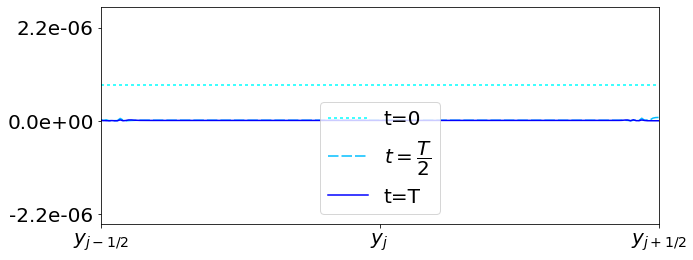

Number 1


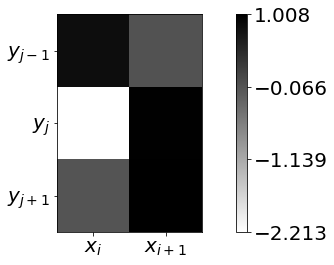

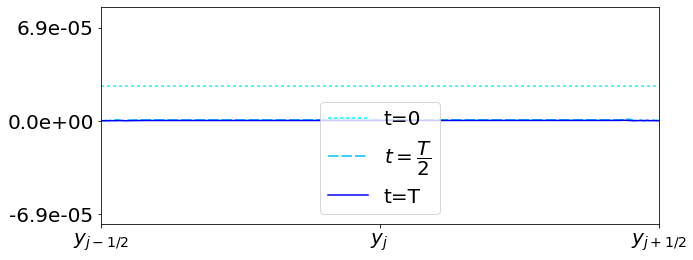

Number 2


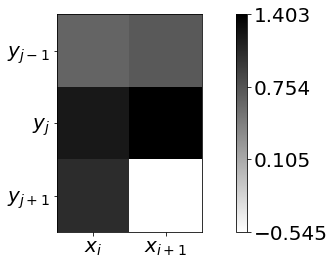

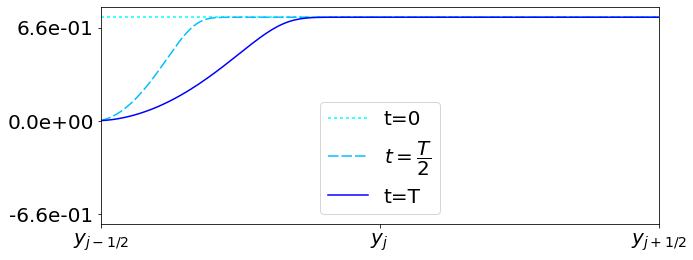

Number 3


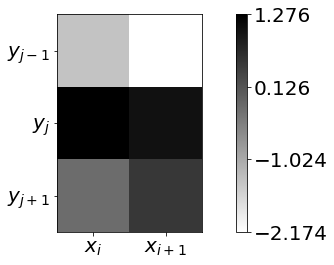

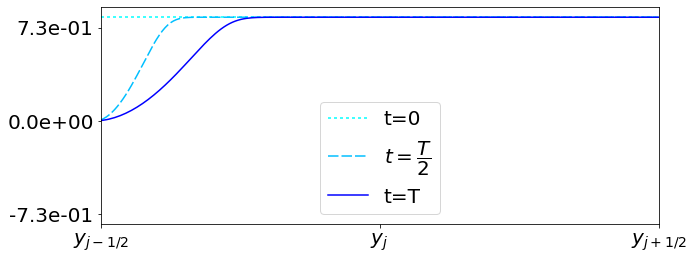

Number 4


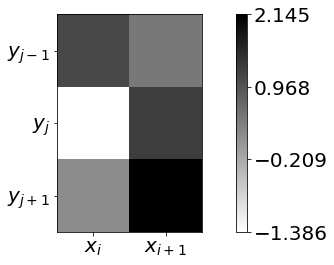

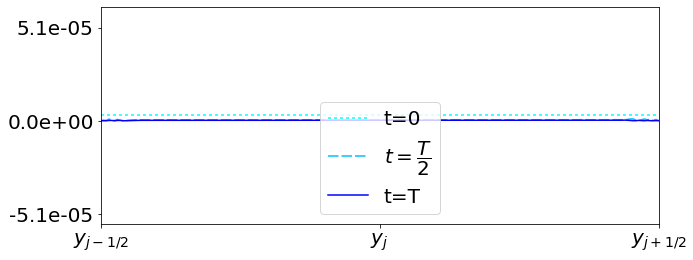

Number 5


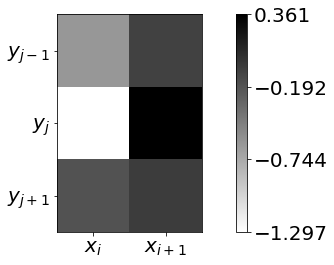

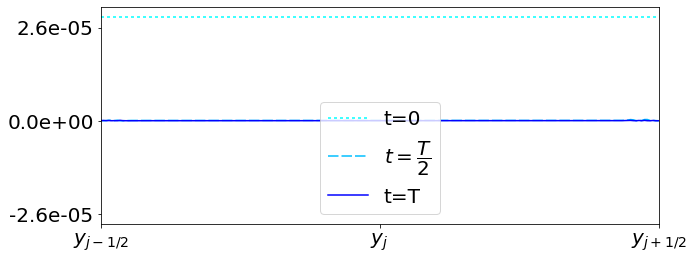

Number 6


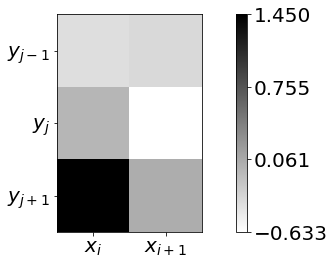

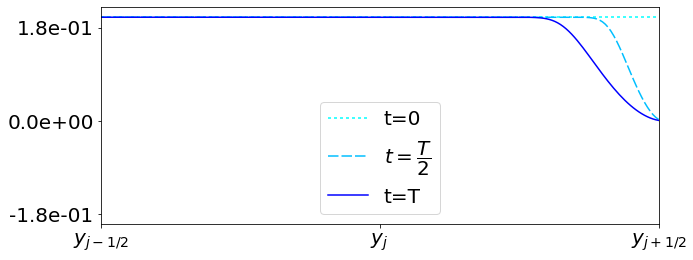

Number 7


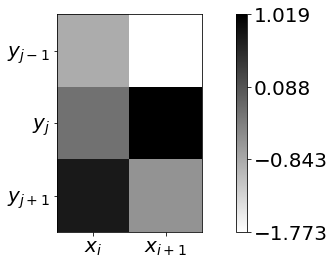

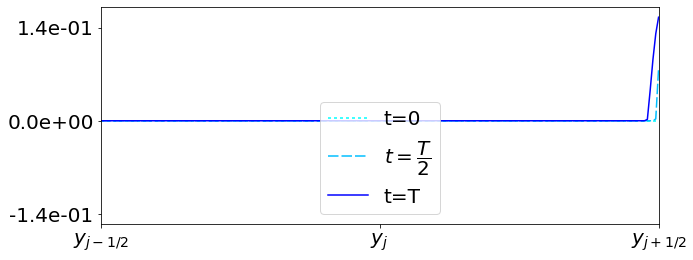

Number 8


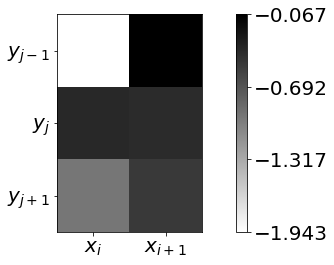

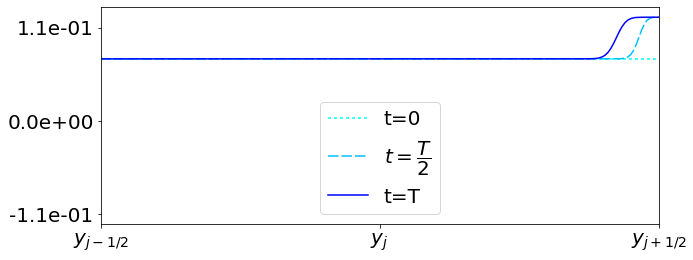

Number 9


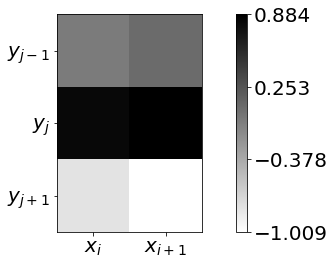

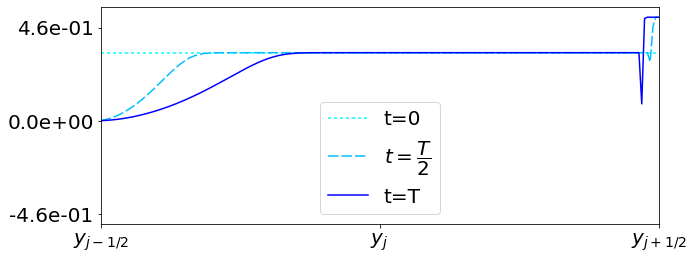

In [9]:
for i in range(len(data.flux)):
    print("Number",i)
    flux.plot_n_save_cells(data=data.data[i,:-1])
    flux.plot_n_save_flux(flux=data.flux[i])